
# **PART 1: EXPLORATORY ANALYSIS OF ORIGINAL DATA**



# 1.Introduction

The main objective of this analysis is to explore and understand the vocalization patterns of various bird species using real audio recording data. By analyzing vocalization types, durations, species frequency, and geographic distribution, we aim to identify trends and insights that could support future research in ornithology, bioacoustics, or conservation.

The dataset used for this analysis, named Birds Voice.csv, contains metadata of bird audio recordings collected from the Xeno-Canto platform. It includes information such as the common and scientific names of the species, the type of vocalization (e.g., song, call), recording duration, date, location (country), and a direct download link to the audio file.

The analysis begins with loading and cleaning the dataset, including filtering out incomplete or irrelevant vocalization types. We then perform exploratory data analysis (EDA) to examine species frequency and geographic distribution. Further, we focus on species observed in the Americas, analyze the duration and type of vocalizations, and generate visualizations such as bar charts and an interactive world map. Lastly, we download a selection of audio recordings and generate spectrograms to visualize the acoustic characteristics of selected species.

# 2.Data loading and initial exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import plotly.express as px
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import requests

In [5]:
df = pd.read_csv("Birds Voice.csv", delimiter=",",  quotechar='"',)

In [ ]:
print(df.head())


🔎 Primeras filas del archivo:
                                         common_name  \
0                                     Common Ostrich   
1                                     Common Ostrich   
2                                     Common Ostrich   
3                                     Common Ostrich   
4  Common Ostrich,Struthio camelus,Morioka Zoolog...   

              scientific_name recordist_name recording_length        Date  \
0  Struthio camelus australis  Frank Lambert             0:53  2019-10-30   
1            Struthio camelus   Jeremy Hegge             0:26  2014-11-20   
2            Struthio camelus   Jeremy Hegge             0:04  2014-11-21   
3            Struthio camelus  Derek Solomon             0:11  2010-02-09   
4                         NaN            NaN              NaN         NaN   

   TYPE     xc_id   Time       Country                           Download_link  
0  call  XC516153  08:05  South Africa  https://xeno-canto.org/516153/download  
1  call

In [ ]:
vocalizations_to_remove = ["begging call", "wing sound", "duet"]
df = df[~df["TYPE"].isin(vocalizations_to_remove)]

# 3.General Analysis

In [ ]:
scientific_name_counts = df['scientific_name'].value_counts().reset_index()
scientific_name_counts.columns = ["scientific_name", "observations"]

print(scientific_name_counts.head(50))

                scientific_name  observations
0   Crypturellus transfasciatus            30
1      Crypturellus strigulosus            30
2            Tinamus solitarius            29
3              Tinamus guttatus            29
4       Crypturellus variegatus            29
5               Taoniscus nanus            29
6        Crypturellus bartletti            28
7            Nothocercus julius            28
8          Ortalis poliocephala            28
9               Ortalis garrula            28
10        Crypturellus cinereus            28
11    Crypturellus atrocapillus            27
12            Nothura boraquira            27
13               Ortalis motmot            27
14                Tinamus major            26
15       Crypturellus undulatus            26
16            Ortalis ruficauda            26
17           Ortalis columbiana            26
18    Crypturellus parvirostris            26
19          Ortalis cinereiceps            25
20     Crypturellus cinnamomeus   

In [ ]:
country_scientific_counts = df.groupby(["Country", "scientific_name"]).size().reset_index(name="observations")

fig = px.scatter_geo(country_scientific_counts,
                     locations="Country",
                     locationmode="country names",
                     color="scientific_name",
                     size="observations",
                     hover_name="scientific_name",
                     title="Observaciones de Aves por País y Especie",
                     projection="natural earth")

fig.update_layout(title=" Observaciones de Aves por País y Especie", title_x=0.5)
fig.show()


# 4.Regional Focus

In [ ]:
america_countries = [
    "Mexico", "Brazil", "Argentina", "Colombia",
    "Chile", "Peru", "Venezuela", "Ecuador", "Bolivia", "Paraguay", "Uruguay",
    "Guatemala", "Honduras", "El Salvador", "Nicaragua", "Costa Rica", "Panama",
    "Cuba", "Dominican Republic", "Puerto Rico", "Belize", "Guyana",
    "Suriname", "French Guiana", "Jamaica", "Haiti", "Bahamas", "Trinidad and Tobago"
]

df_america = df[df["Country"].isin(america_countries)]

species_counts = df_america["scientific_name"].value_counts().head(50).index.tolist()

top_50_america = df_america[df_america["scientific_name"].isin(species_counts)]

species_observations = top_50_america.groupby(["scientific_name", "TYPE"]).size().reset_index(name="observations")

top_50_with_type = species_observations.sort_values(by="observations", ascending=False).head(50)

print("\n Top 50 most observer species in america:")
print(top_50_with_type)

top_50_with_type.to_csv("Top_50_Species_America_with_Observations_and_Type.csv", index=False)
#print("\n✅ Archivo guardado como 'Top_50_Species_America_with_Observations_and_Type.csv'")




🔝 Top 50 especies más observadas en América (con TYPE):
                 scientific_name        TYPE  observations
25      Crypturellus strigulosus        song            29
153             Tinamus guttatus        song            28
35       Crypturellus variegatus        song            27
39            Nothocercus julius        song            27
9          Crypturellus cinereus        song            26
4         Crypturellus bartletti        song            25
32        Crypturellus undulatus        song            23
30   Crypturellus transfasciatus        song            23
11      Crypturellus cinnamomeus        song            23
158           Tinamus solitarius        song            23
20     Crypturellus parvirostris        song            22
6          Crypturellus boucardi        song            21
46             Nothura boraquira        song            21
155                Tinamus major        song            20
2      Crypturellus atrocapillus        song            20

# 5.Vocalization duration analysis

Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'float' object has no attribute 'split'
Error converting time: nan - 'floa

<ipython-input-12-7a47928869d4>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




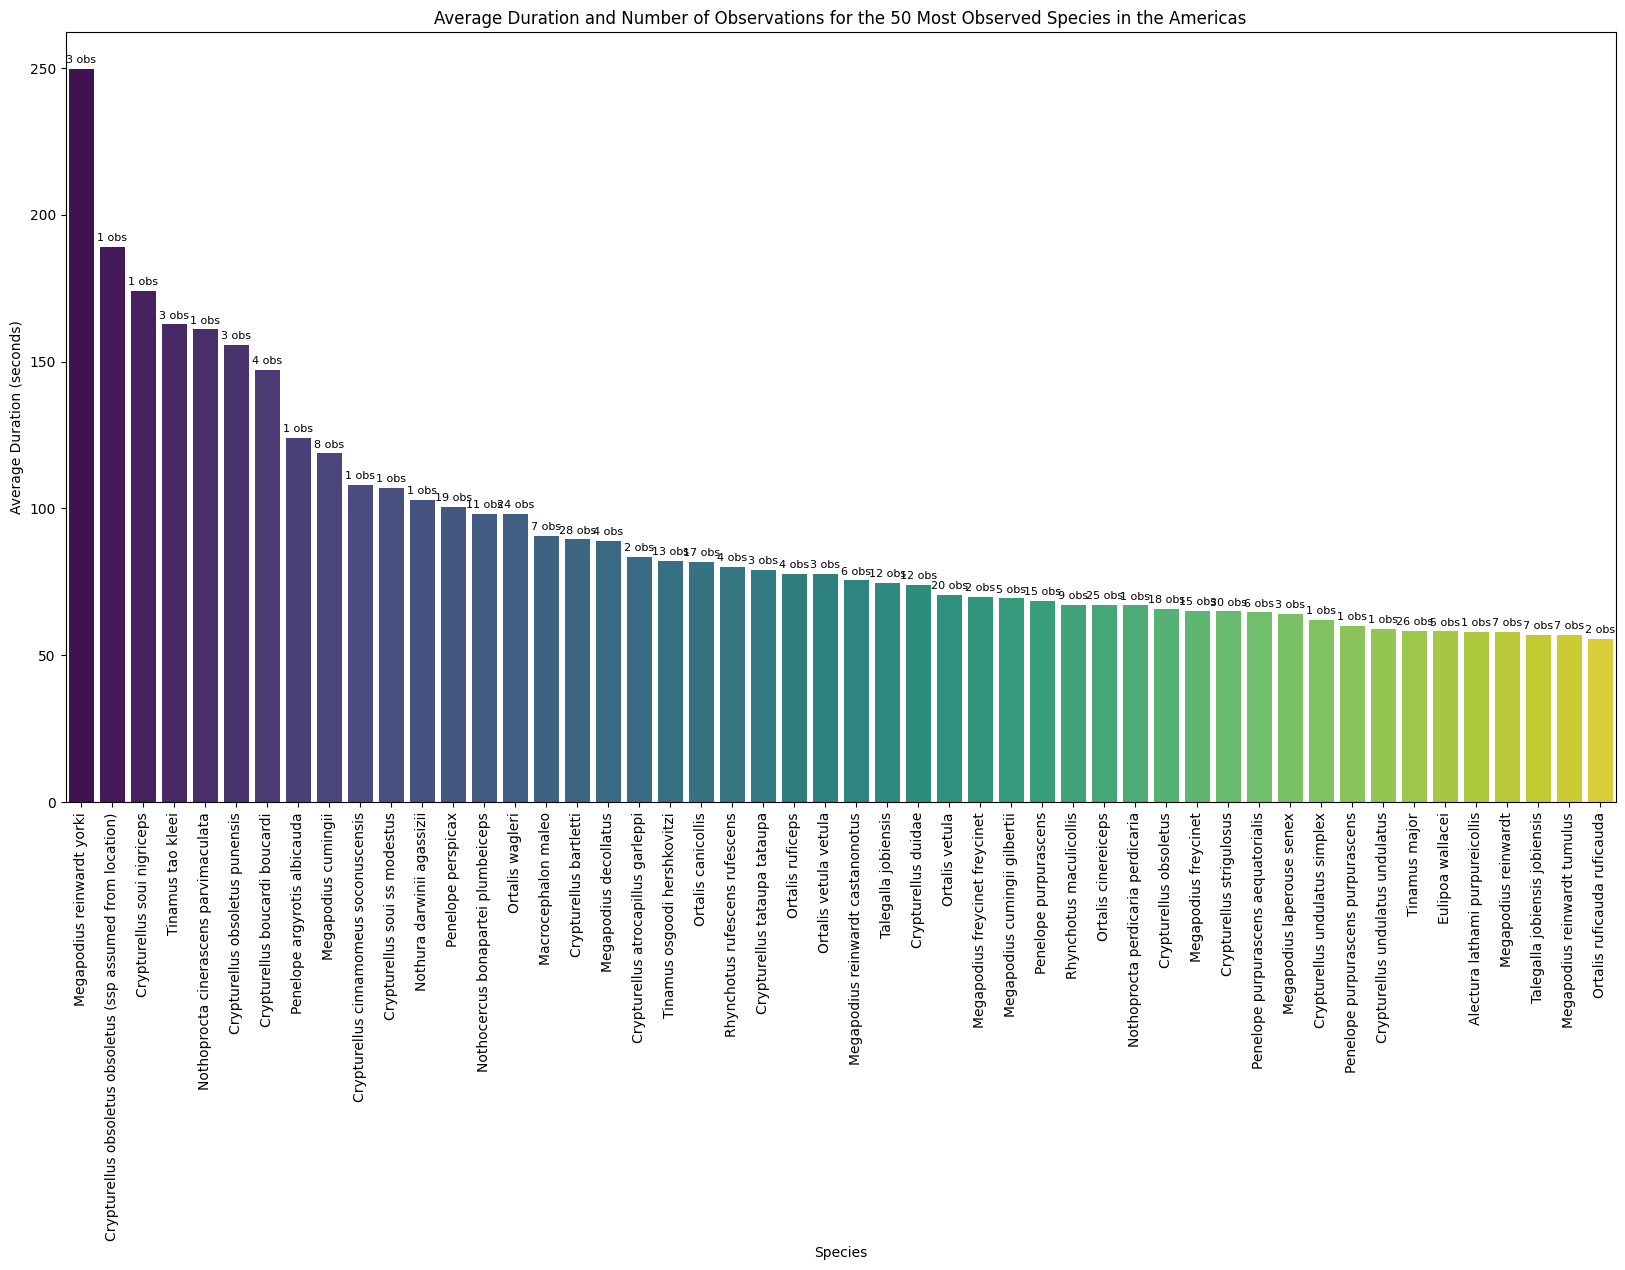

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def convert_to_seconds(time_str):
    try:
        parts = time_str.split(":")
        if len(parts) == 2:
            minutes, seconds = int(parts[0]), int(parts[1])
            return minutes * 60 + seconds
        elif len(parts) == 3:
            hours, minutes, seconds = int(parts[0]), int(parts[1]), int(parts[2])
            return hours * 3600 + minutes * 60 + seconds
    except Exception as e:
        print(f"Error converting time: {time_str} - {e}")
        return None

df['duration_seconds'] = df['recording_length'].apply(convert_to_seconds)

species_stats = df.groupby("scientific_name").agg(
    average_duration=("duration_seconds", "mean"),
    observations=("scientific_name", "size")
).sort_values(by="average_duration", ascending=False).reset_index()

plt.figure(figsize=(20, 10))
sns.barplot(x=species_stats["scientific_name"][:50], y=species_stats["average_duration"][:50], palette="viridis")
plt.xticks(rotation=90)

for i in range(50):
    plt.text(i, species_stats["average_duration"][i] + 2,
             f"{species_stats['observations'][i]} obs",
             ha="center", fontsize=8, color="black")

plt.title("Average Duration and Number of Observations for the 50 Most Observed Species in the Americas")
plt.xlabel("Species")
plt.ylabel("Average Duration (seconds)")
plt.show()


# 6.Vocalization type duration

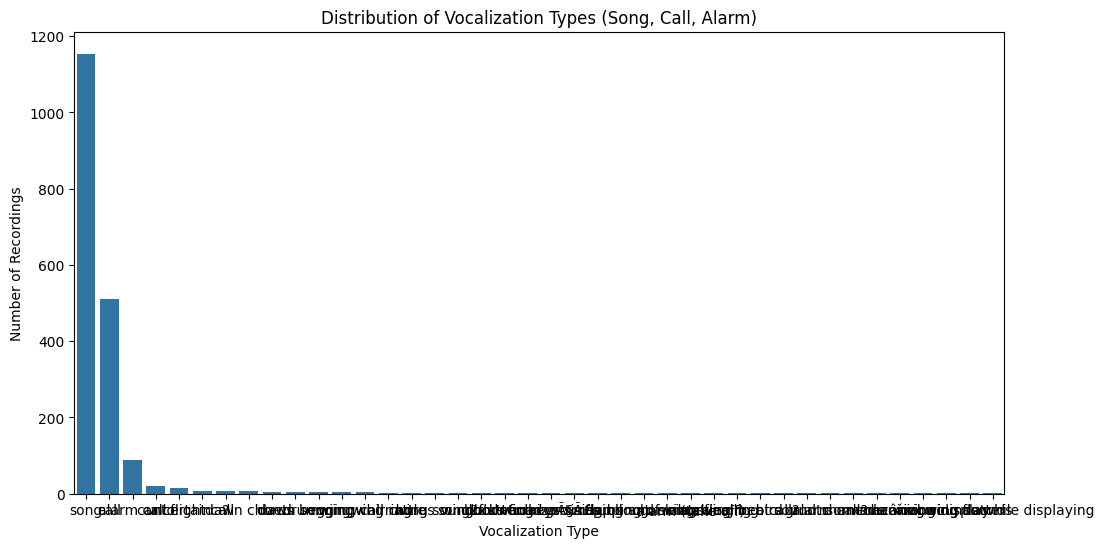

In [13]:
vocalization_counts = df["TYPE"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=vocalization_counts.index, y=vocalization_counts.values)
plt.title("Distribution of Vocalization Types (Song, Call, Alarm)")
plt.xlabel("Vocalization Type")
plt.ylabel("Number of Recordings")
plt.show()


# 7.Spectogram Generation

Descargando https://xeno-canto.org/594846/download...


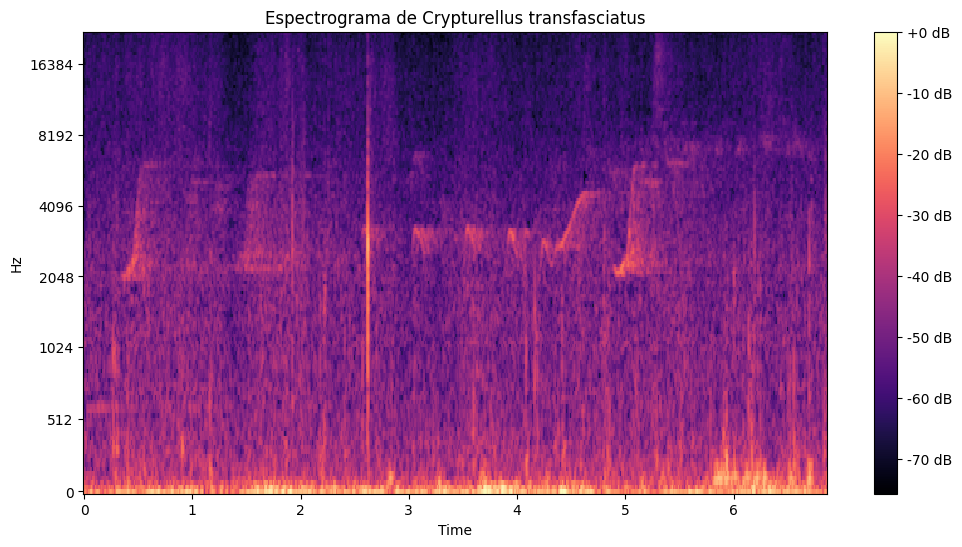

Descargando https://xeno-canto.org/593900/download...


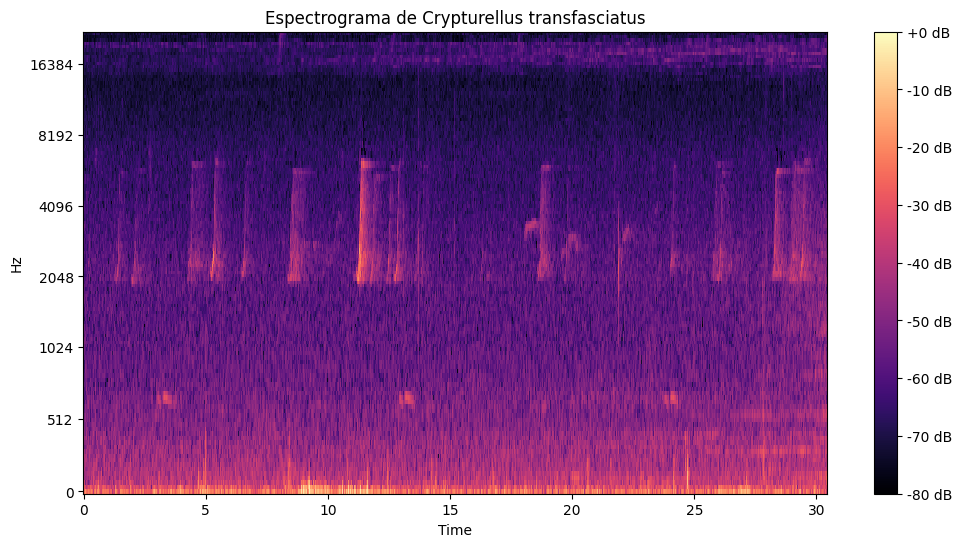

Descargando https://xeno-canto.org/593899/download...


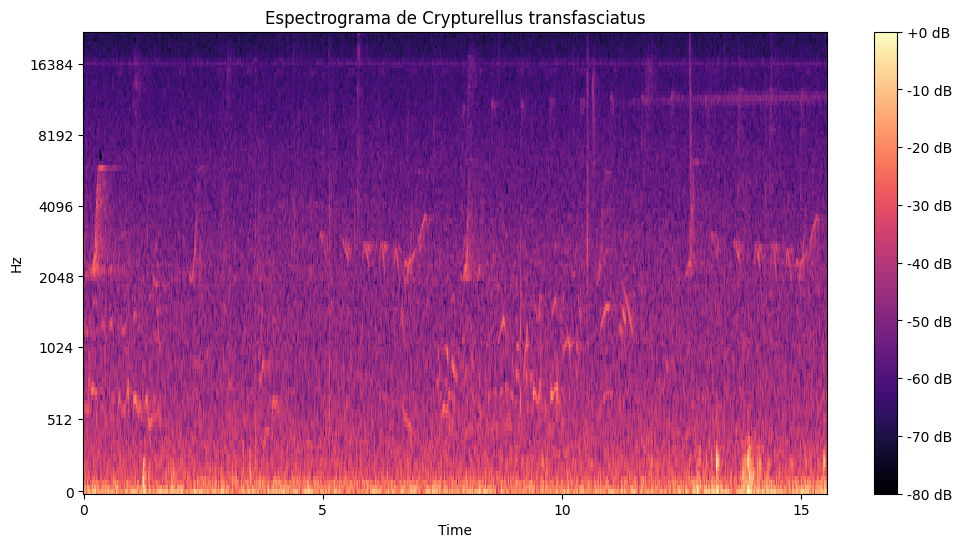

Descargando https://xeno-canto.org/524787/download...


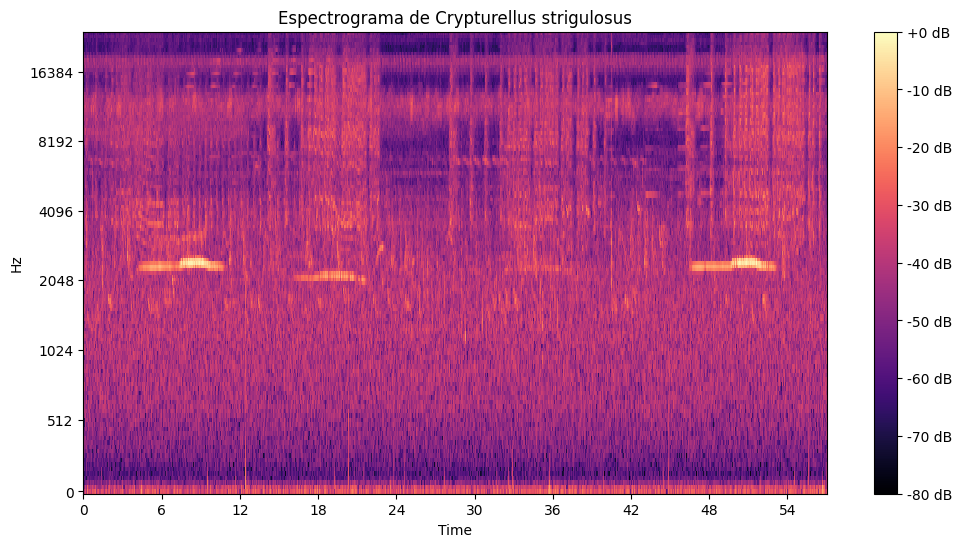

Descargando https://xeno-canto.org/521357/download...


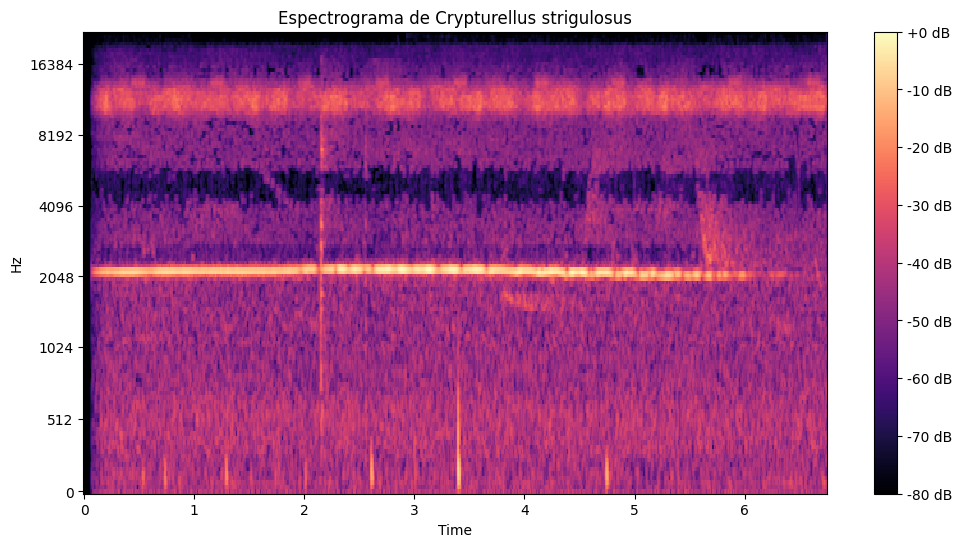

Descargando https://xeno-canto.org/686176/download...


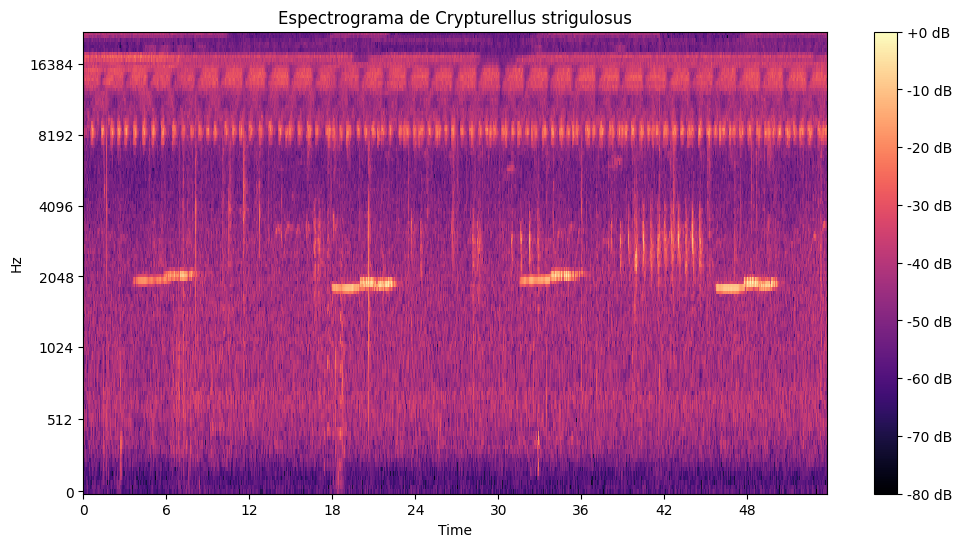

Descargando https://xeno-canto.org/456452/download...


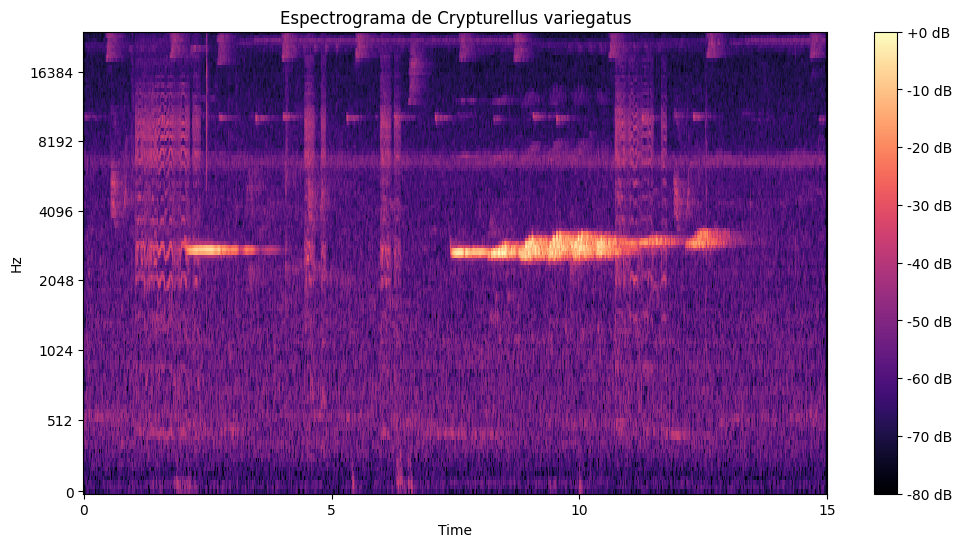

Descargando https://xeno-canto.org/427278/download...


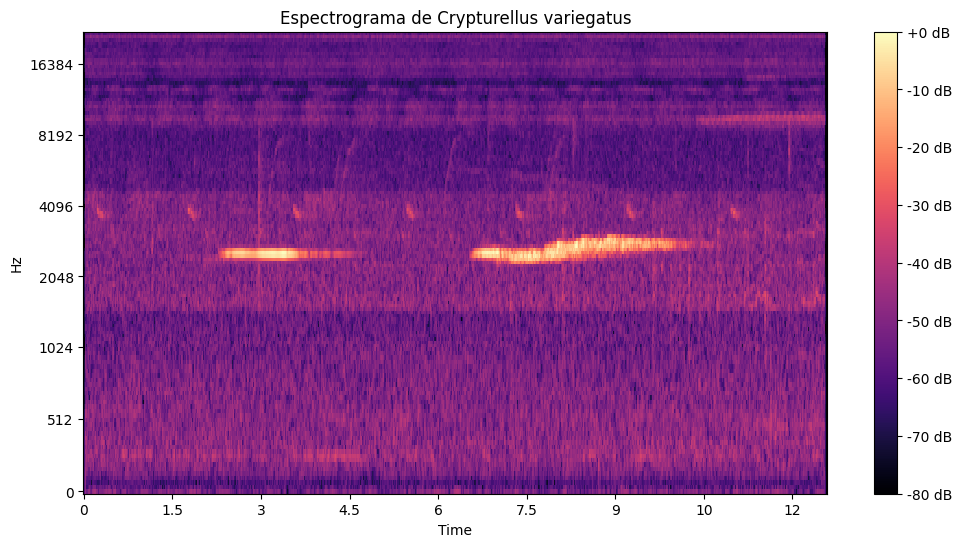

Descargando https://xeno-canto.org/272386/download...


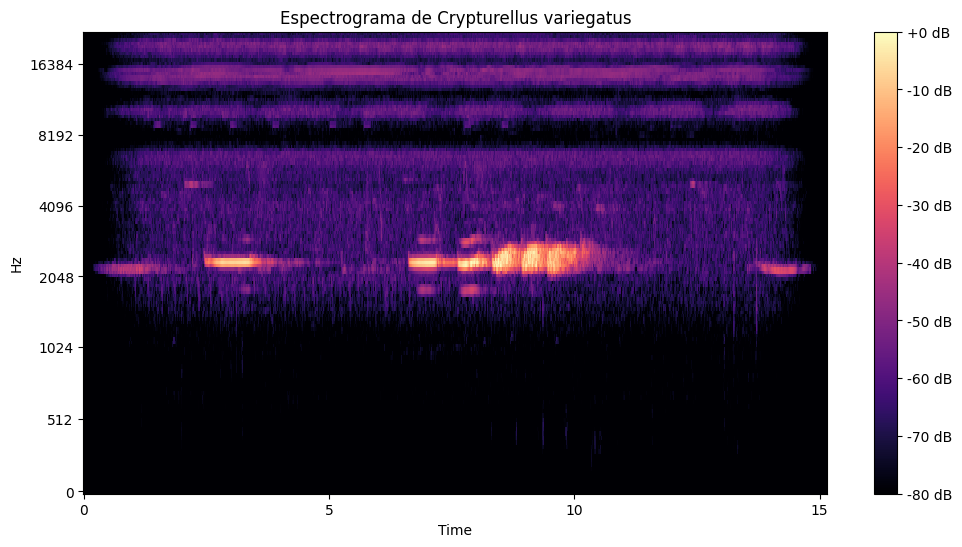

Descargando https://xeno-canto.org/621782/download...


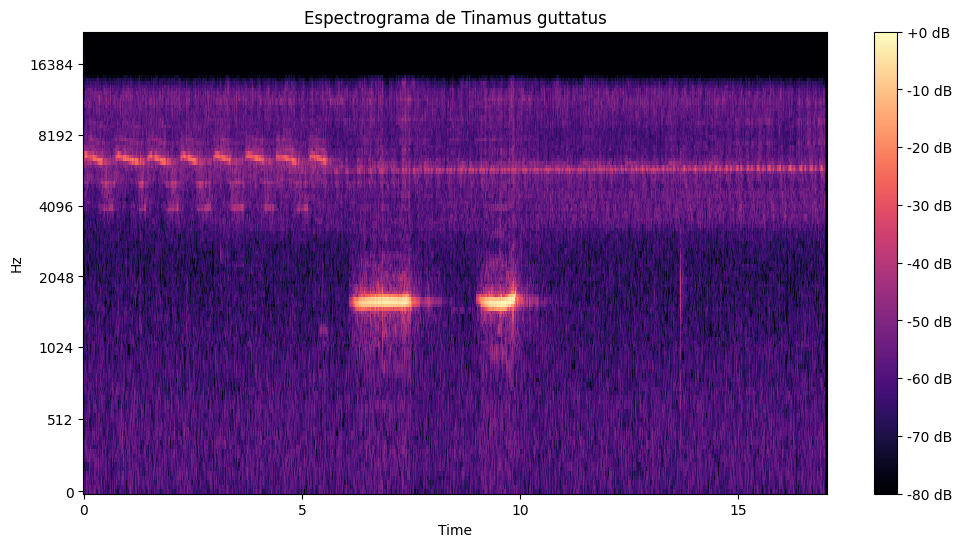

Descargando https://xeno-canto.org/643008/download...


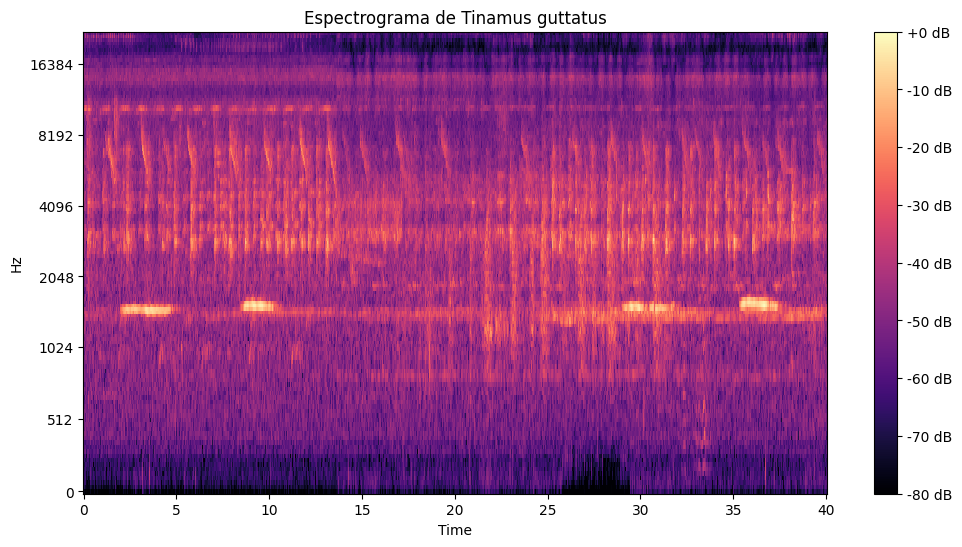

Descargando https://xeno-canto.org/536652/download...


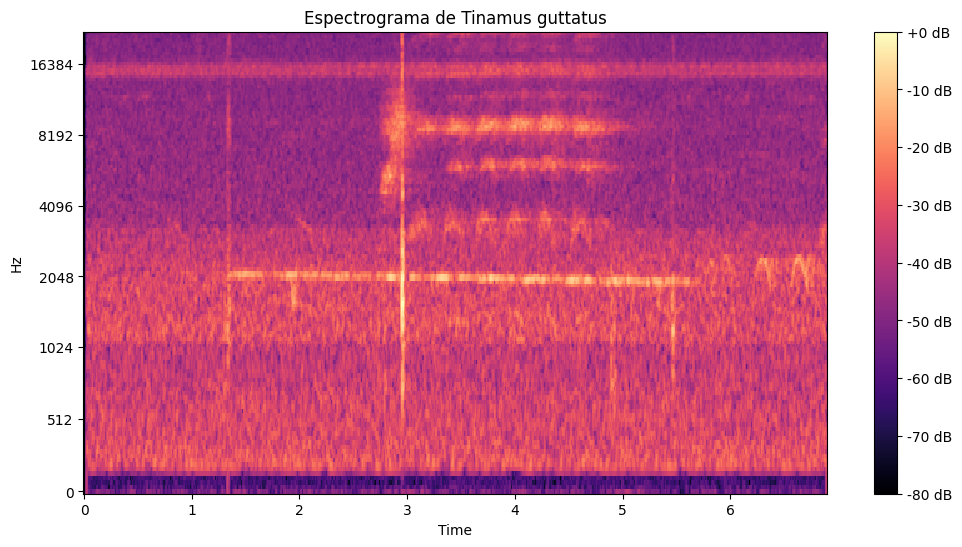

Descargando https://xeno-canto.org/549356/download...


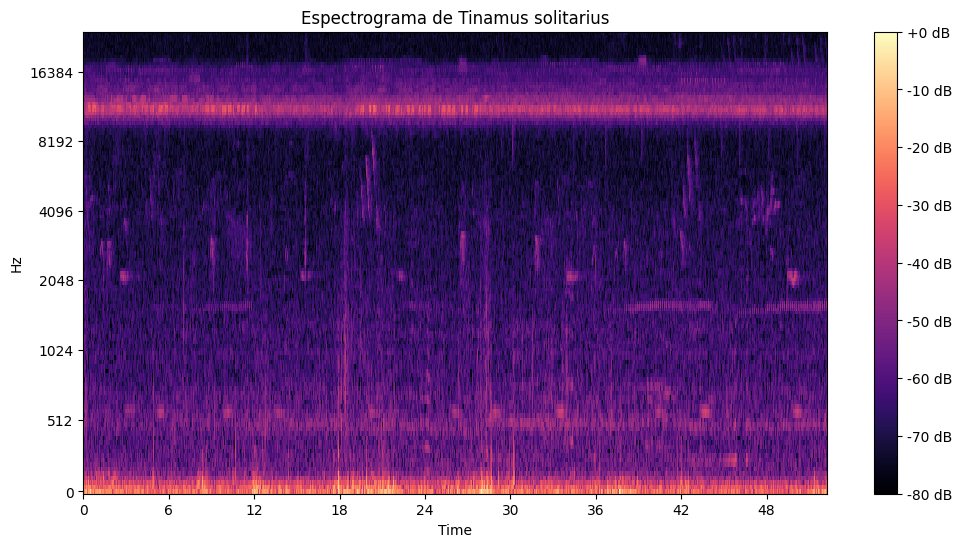

Descargando https://xeno-canto.org/549355/download...


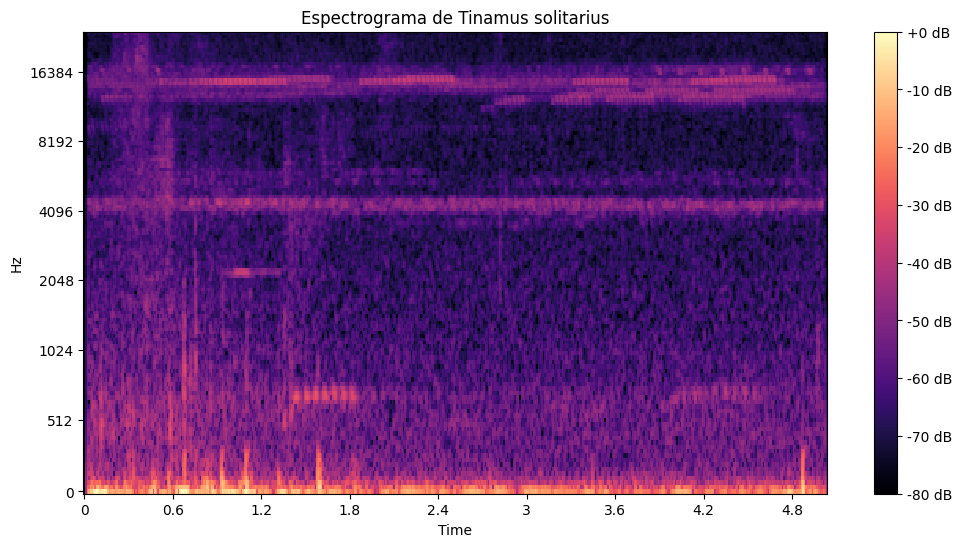

Descargando https://xeno-canto.org/666443/download...


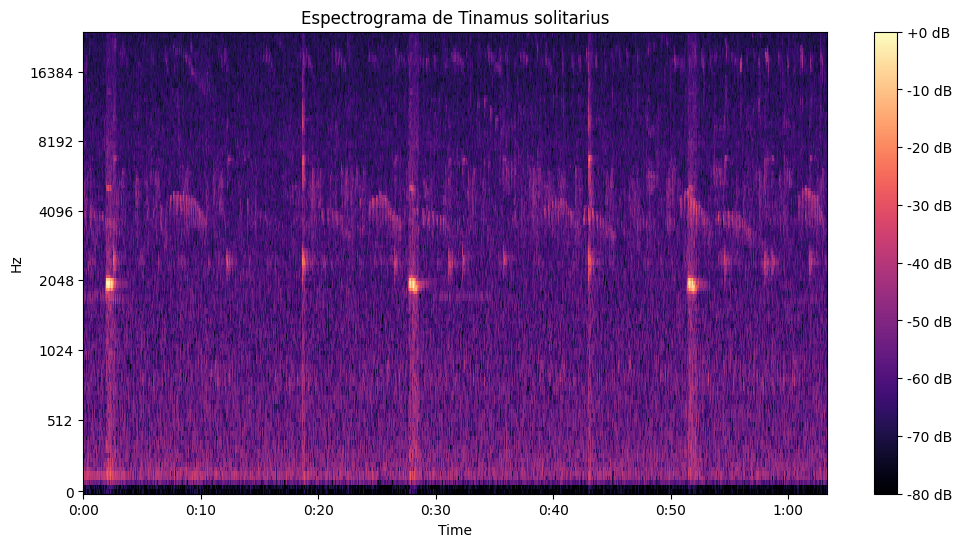

In [ ]:
os.makedirs("Audio_Files", exist_ok=True)
os.makedirs("Spectrograms", exist_ok=True)

selected_species = top_50_america["scientific_name"].value_counts().index[:5].tolist()

for species in selected_species:
    species_files = top_50_america[top_50_america["scientific_name"] == species].head(3)

    for idx, row in species_files.iterrows():
        try:
            audio_url = row["Download_link"]
            file_name = f"Audio_Files/{species.replace(' ', '_')}_{idx}.mp3"

            if not os.path.exists(file_name):
                print(f"Descargando {audio_url}...")
                response = requests.get(audio_url)
                with open(file_name, "wb") as f:
                    f.write(response.content)

            y, sr = librosa.load(file_name, sr=None)

            plt.figure(figsize=(12, 6))
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
            S_dB = librosa.power_to_db(S, ref=np.max)
            librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
            plt.colorbar(format="%+2.0f dB")
            plt.title(f"Espectrograma de {species}")
            plt.savefig(f"Spectrograms/{species.replace(' ', '_')}_{idx}.png")
            plt.show()

        except Exception as e:
            print(f"Error processing {audio_url}: {e}")


# **PART 2: Analysis of Selected Bird Species**

# 1.Introduction

For this second phase of the analysis, we focused on a curated selection of 50 bird species from the original dataset `Birds Voice.csv`. These species were chosen based on criteria such as observation frequency, data quality, and biological relevance within the Tinamidae and Cracidae families (e.g., Tinamous, Guans, Chachalacas).

The goal is to perform a more detailed and acoustically focused analysis, including vocalization types, durations, and spectrograms, using only these 50 species.

The filtering process was done by matching the `common_name` field in the dataset to the following selected species list.

# 2.Data selection, loading and Initial exploration


In [6]:
selected_species = [
    "Andean Tinamou", "Little Tinamou", "Speckled Chachalaca", "Andean Guan", "Australian Brushturkey",
    "Band-tailed Guan", "Bartlett Tinamou", "Bearded Guan", "Black-capped Tinamou", "Blue-throated Piping Guan",
    "Brazilian Tinamou", "Brown Tinamou", "Brushland Tinamou", "Cauca Guan", "Chaco Chachalaca",
    "Chestnut-winged Chachalaca", "Cinereous Tinamou", "Colombian Chachalaca", "Crested Guan", "Dusky Megapode",
    "Dusky-legged Guan", "Dwarf Tinamou", "Great Tinamou", "Grey Tinamou", "Grey-headed Chachalaca",
    "Highland Tinamou", "Little Chachalaca", "Orange-footed Scrubfowl", "Pale-browed Tinamou", "Plain Chachalaca",
    "Red-legged Tinamou", "Red-winged Tinamou", "Rufous-bellied Chachalaca", "Rufous-headed Chachalaca",
    "Rufous-vented Chachalaca", "Rusty-margined Guan", "Slaty-breasted Tinamou", "Small-billed Tinamou",
    "Solitary Tinamou", "Spix's Guan", "Spotted Nothura", "Tataupa Tinamou", "Tawny-breasted Tinamou",
    "Thicket Tinamou", "Undulated Tinamou", "Variegated Tinamou", "West Mexican Chachalaca",
    "White-bellied Nothura", "White-throated Tinamou", "Yellow-legged Tinamou"
]

df_selected = df[df["common_name"].isin(selected_species)]


# 2.General Analysis

In [7]:
scientific_name_counts = df_selected['scientific_name'].value_counts().reset_index()
scientific_name_counts.columns = ["scientific_name", "observations"]

print(scientific_name_counts.head(50))

                       scientific_name  observations
0             Crypturellus strigulosus            30
1          Crypturellus transfasciatus            30
2                   Tinamus solitarius            29
3                     Tinamus guttatus            29
4              Crypturellus variegatus            29
5                      Taoniscus nanus            29
6                Crypturellus cinereus            28
7                 Ortalis poliocephala            28
8                      Ortalis garrula            28
9                       Ortalis motmot            28
10                  Ortalis columbiana            28
11                   Nothura boraquira            28
12                  Nothocercus julius            28
13           Crypturellus atrocapillus            27
14                       Tinamus major            26
15              Crypturellus undulatus            26
16                   Ortalis ruficauda            26
17           Crypturellus parvirostris        

In [14]:
country_scientific_counts = df.groupby(["Country", "scientific_name"]).size().reset_index(name="observations")

fig = px.scatter_geo(country_scientific_counts,
                     locations="Country",
                     locationmode="country names",
                     color="scientific_name",
                     size="observations",
                     hover_name="scientific_name",
                     title="Observaciones de Aves por País y Especie",
                     projection="natural earth")

fig.update_layout(title=" Observations in every country", title_x=0.5)
fig.show()


In [8]:
country_scientific_counts = df_selected.groupby(["Country", "scientific_name"]).size().reset_index(name="observations")

fig = px.scatter_geo(country_scientific_counts,
                     locations="Country",
                     locationmode="country names",
                     color="scientific_name",
                     size="observations",
                     hover_name="scientific_name",
                     title="Observaciones de Aves por País y Especie",
                     projection="natural earth")

fig.update_layout(title=" Observaciones de Aves por País y Especie", title_x=0.5)
fig.show()

# 3. Vocalization Duration Analysis

<ipython-input-9-bba93c56b70e>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-bba93c56b70e>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




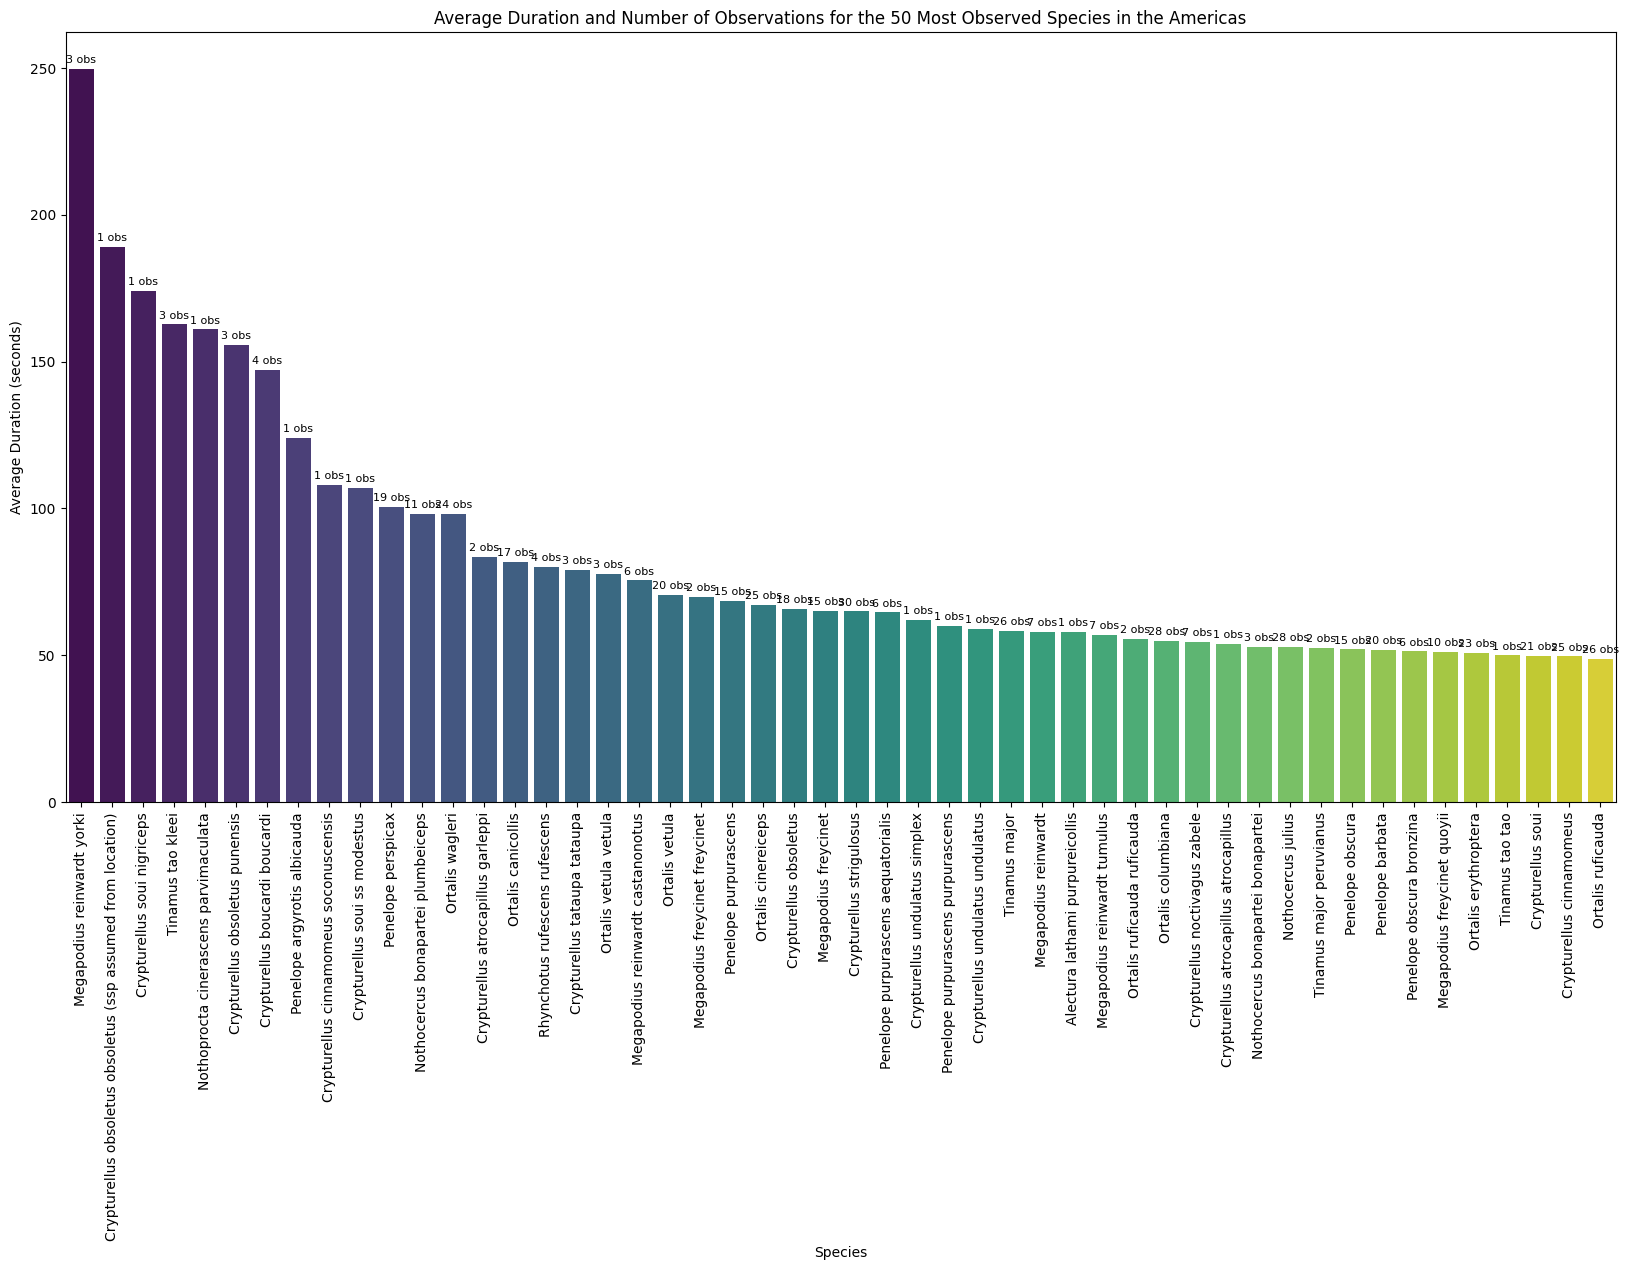

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def convert_to_seconds(time_str):
    try:
        parts = time_str.split(":")
        if len(parts) == 2:
            minutes, seconds = int(parts[0]), int(parts[1])
            return minutes * 60 + seconds
        elif len(parts) == 3:
            hours, minutes, seconds = int(parts[0]), int(parts[1]), int(parts[2])
            return hours * 3600 + minutes * 60 + seconds
    except Exception as e:
        print(f"Error converting time: {time_str} - {e}")
        return None

df_selected['duration_seconds'] = df_selected['recording_length'].apply(convert_to_seconds)

species_stats = df_selected.groupby("scientific_name").agg(
    average_duration=("duration_seconds", "mean"),
    observations=("scientific_name", "size")
).sort_values(by="average_duration", ascending=False).reset_index()

plt.figure(figsize=(20, 10))
sns.barplot(x=species_stats["scientific_name"][:50], y=species_stats["average_duration"][:50], palette="viridis")
plt.xticks(rotation=90)

for i in range(50):
    plt.text(i, species_stats["average_duration"][i] + 2,
             f"{species_stats['observations'][i]} obs",
             ha="center", fontsize=8, color="black")

plt.title("Average Duration and Number of Observations for the 50 Most Observed Species in the Americas")
plt.xlabel("Species")
plt.ylabel("Average Duration (seconds)")
plt.show()


# 4. Vocalization type Duration

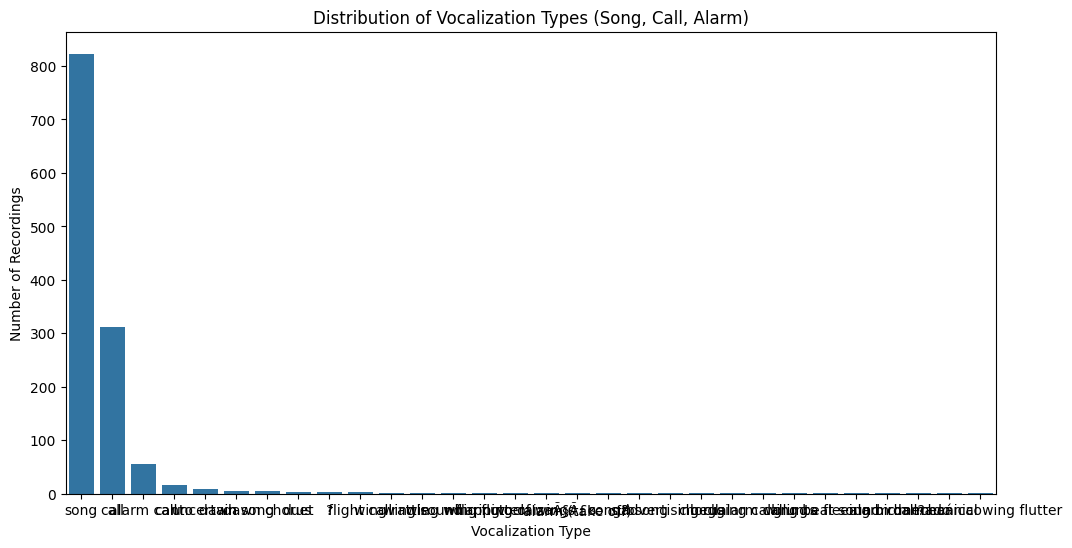

In [10]:
vocalization_counts = df_selected["TYPE"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=vocalization_counts.index, y=vocalization_counts.values)
plt.title("Distribution of Vocalization Types (Song, Call, Alarm)")
plt.xlabel("Vocalization Type")
plt.ylabel("Number of Recordings")
plt.show()